In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['target'] = data.target

In [6]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [15]:
#to find duplicates
df.duplicated().sum()

0

In [17]:
# Identify and handle outliers

Text(0.5, 1.0, 'boxplot of mean radius by target')

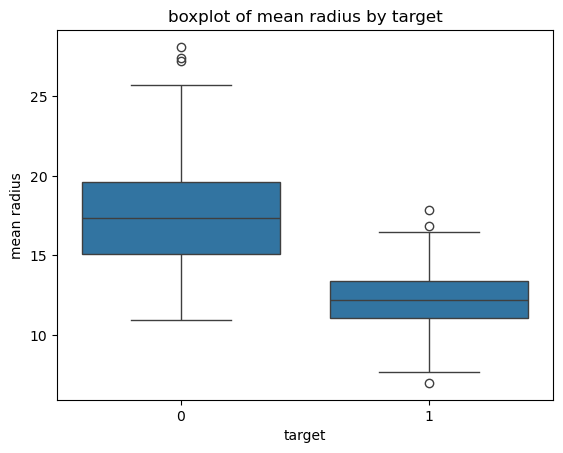

In [19]:
sns.boxplot(x=df['target'],y=df['mean radius'] )
plt.title('boxplot of mean radius by target')

In [21]:
for columns in df.columns:
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr

In [23]:
df_cleaned = df[(df[columns]>=lower_bound) & (df[columns]<=upper_bound)]
df_cleaned.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
#Modeling

In [27]:
x = df_cleaned
y = df_cleaned.target

In [29]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns='target'))

In [31]:
scaled_df = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_df['target'] = df['target']


In [33]:
scaled_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


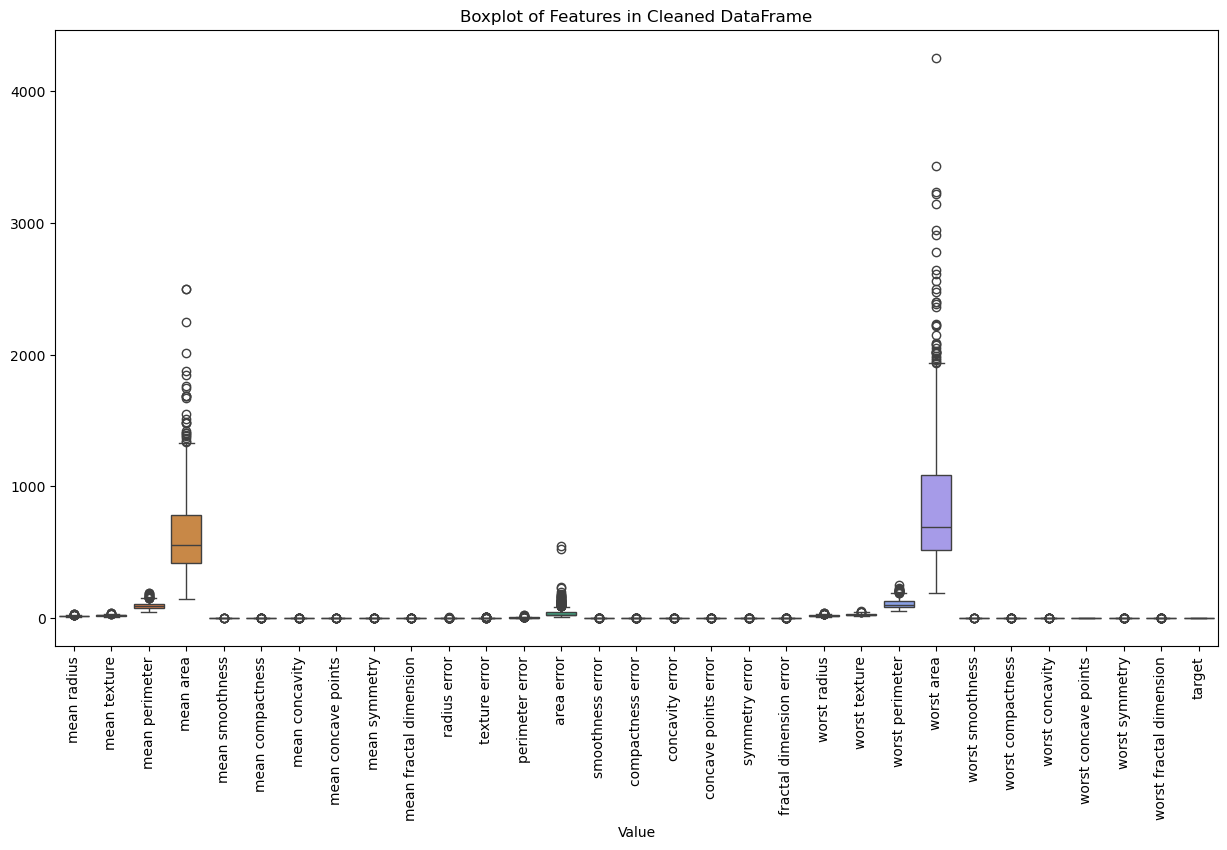

In [35]:
# Plot a boxplot for each numeric column in the cleaned DataFrame
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned)
plt.title("Boxplot of Features in Cleaned DataFrame")
plt.xticks(rotation=90)
plt.xlabel("Value")
plt.show()


In [36]:
#Classification Alghorithm


In [39]:
#1.Logistic regression

In [41]:
x = df_cleaned.drop(columns=['target'])
y = df_cleaned['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(x_train_scaled,y_train)

LogisticRegression()

In [47]:
y_pred = model_1.predict(x_test_scaled)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [49]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int32

In [51]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9824561403508771

In [53]:
print(f"accuracy: {accuracy:.3f}")

accuracy: 0.982


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [57]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  2],
       [ 0, 71]], dtype=int64)

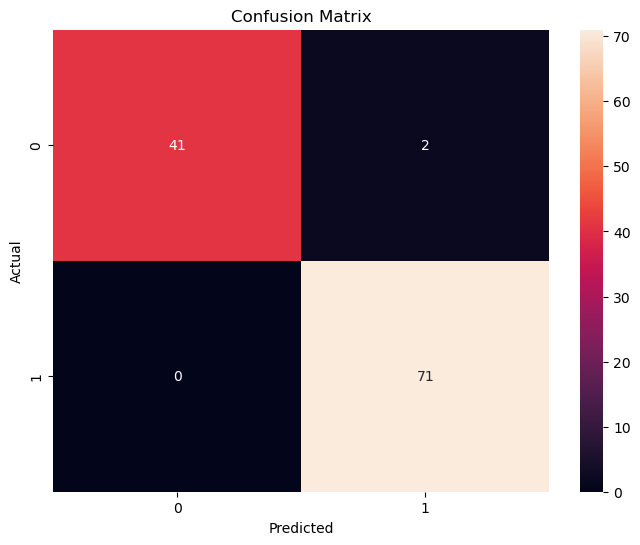

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

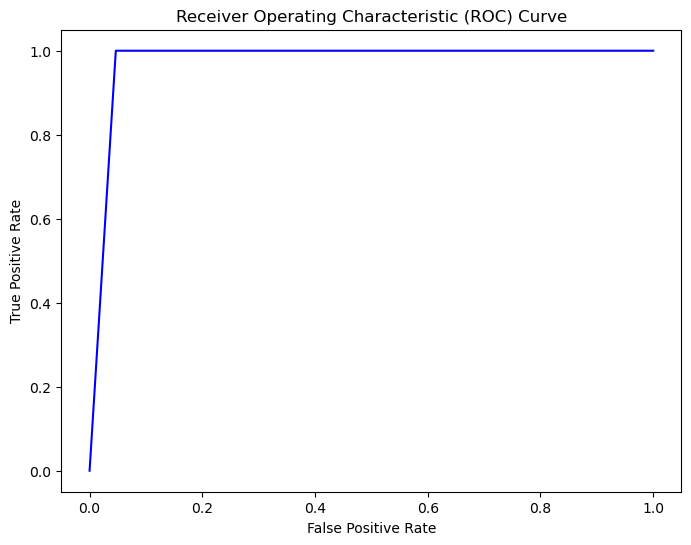

In [61]:
fpr,tpr,_ = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

In [63]:
#2. Decision treeclassifier

In [65]:
model_2 = DecisionTreeClassifier(random_state = 42,max_depth = 10)
model_2.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [67]:
y_pred_dt = model_2.predict(x_test_scaled)

In [69]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.9210526315789473

In [71]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.92      0.96      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [73]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_dt

array([[37,  6],
       [ 3, 68]], dtype=int64)

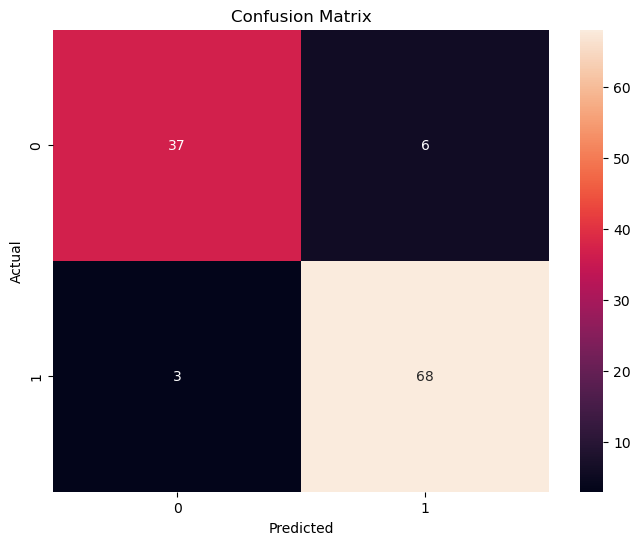

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

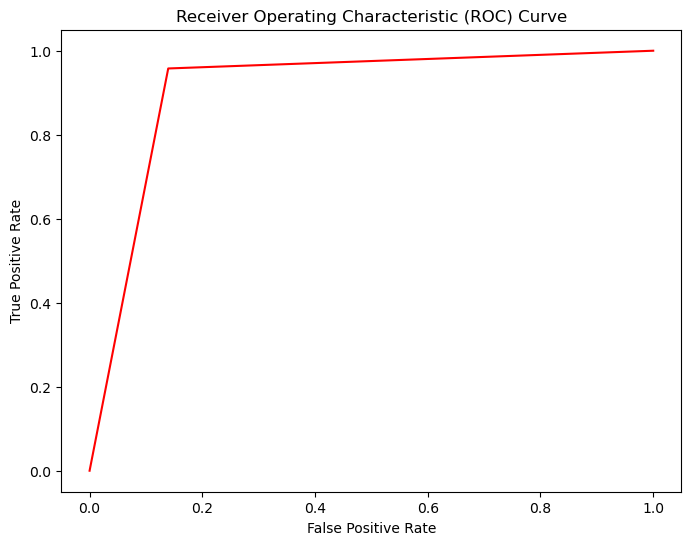

In [77]:
fpr,tpr,_ = roc_curve(y_test,y_pred_dt)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

In [79]:
#3.Random forest classsifier

In [81]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [83]:
y_pred_rf = rf_model.predict(x_test_scaled)

In [85]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.9649122807017544

In [87]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [89]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[40,  3],
       [ 1, 70]], dtype=int64)

<Axes: >

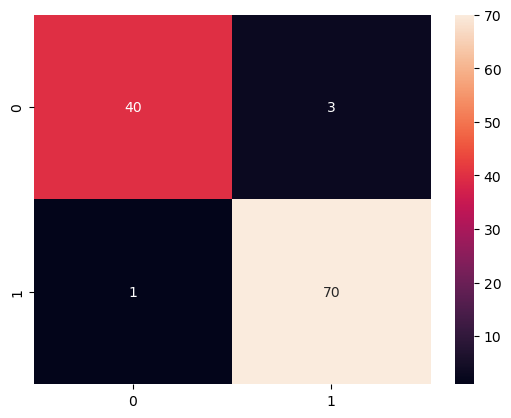

In [91]:
sns.heatmap(cm_rf,annot = True)

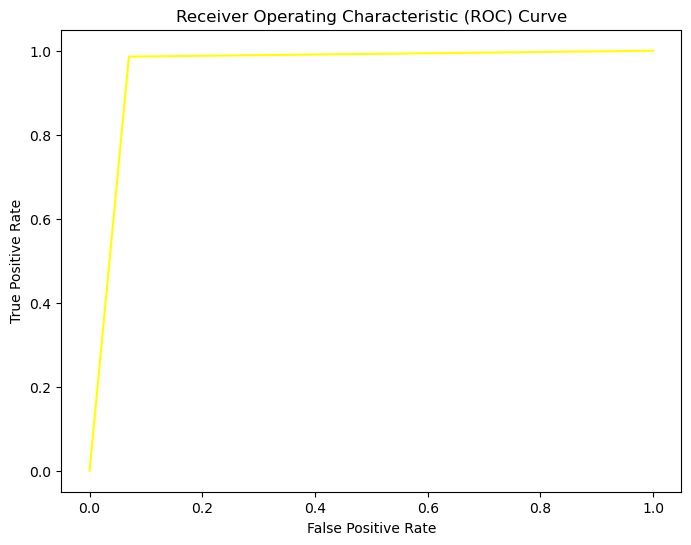

In [93]:
fpr,tpr,_ = roc_curve(y_test,y_pred_rf)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='yellow', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

In [95]:
#4. Support vector machine

In [97]:
model_3 = SVC(probability = True)
model_3.fit(x_train_scaled,y_train)

SVC(probability=True)

In [99]:
y_pred_svc = model_3.predict(x_test_scaled)

In [101]:
accuracy_svc =accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.9824561403508771

In [103]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [105]:
cm_svc = confusion_matrix(y_test,y_pred_svc)
cm_svc

array([[41,  2],
       [ 0, 71]], dtype=int64)

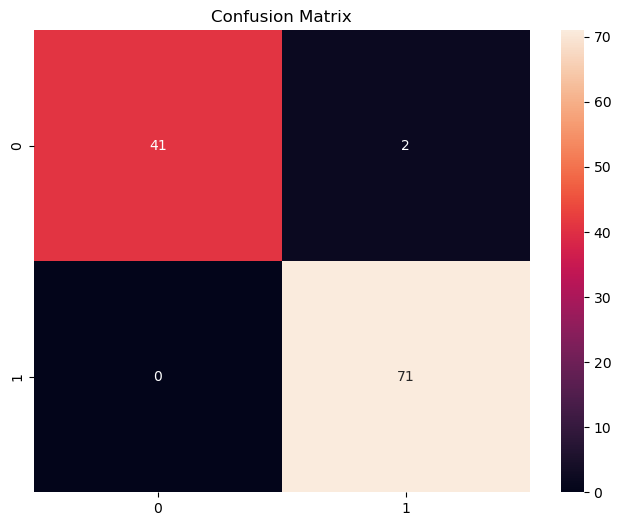

In [107]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True)
plt.title('Confusion Matrix')
plt.show()

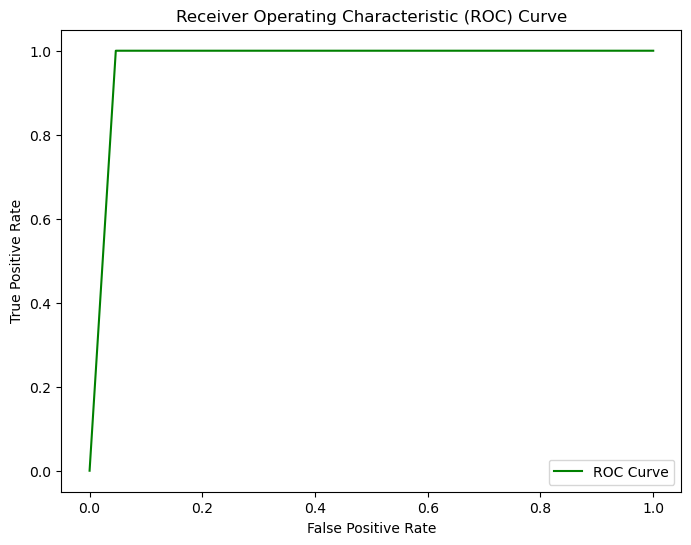

In [109]:
fpr,tpr,_ = roc_curve(y_test,y_pred_svc)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc='lower right')
plt.show()

In [111]:
# 5.K-NN (KNeighboursClassifiers)


In [113]:
model_4 = KNeighborsClassifier(n_neighbors=5)
model_4.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [115]:
y_pred_knn = model_4.predict(x_test_scaled)

In [117]:
accuracy_knn = accuracy_score(y_test,y_pred_knn)
accuracy_knn

0.956140350877193

In [119]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [121]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[40,  3],
       [ 2, 69]], dtype=int64)

<Axes: >

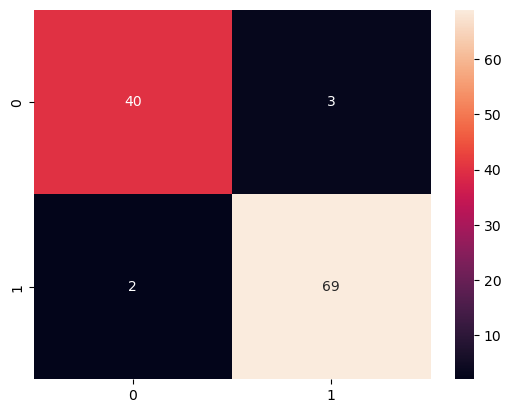

In [123]:
sns.heatmap(cm_knn,annot = True)

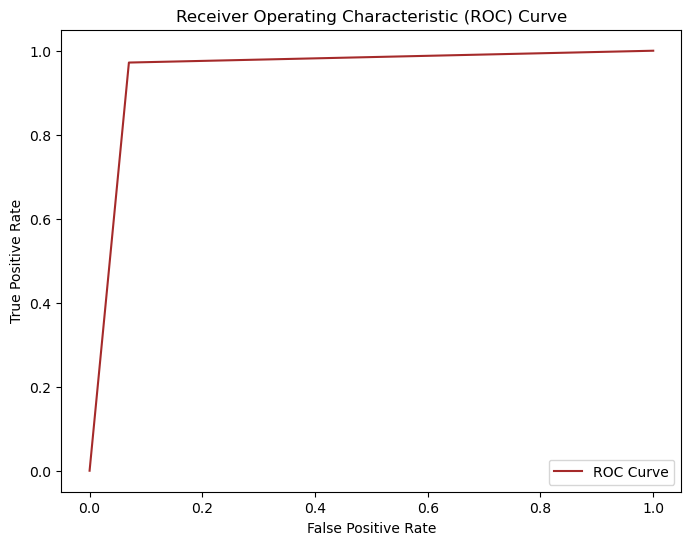

In [125]:
fpr,tpr,_ = roc_curve(y_test,y_pred_knn)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='brown', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc='lower right')
plt.show()

In [127]:
#GaussianNB

In [129]:
model_5 = GaussianNB()
model_5.fit(x_train_scaled,y_train)

GaussianNB()

In [131]:
y_pred_nb = model_5.predict(x_test_scaled)

In [133]:
accuracy_nb = accuracy_score(y_test,y_pred_nb)
accuracy_nb

0.956140350877193

In [135]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [137]:
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_nb

array([[39,  4],
       [ 1, 70]], dtype=int64)

<Axes: >

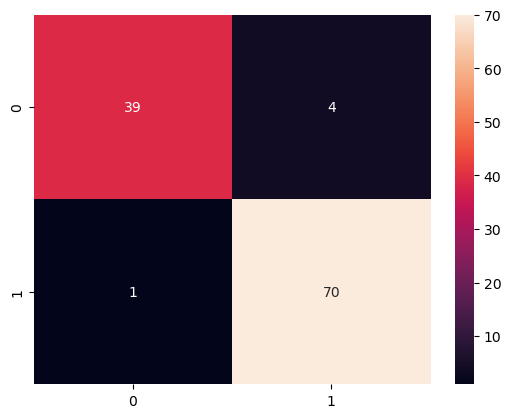

In [139]:
sns.heatmap(cm_nb,annot = True)

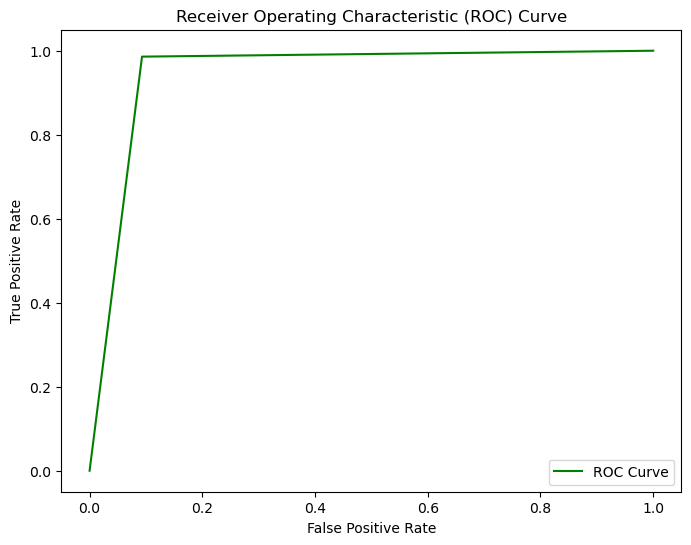

In [141]:
fpr,tpr,_ = roc_curve(y_test,y_pred_nb)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc='lower right')
plt.show()

In [143]:
# Gradient Boosting

In [145]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [147]:
gb_model.fit(x_train_scaled,y_train)

GradientBoostingClassifier(random_state=42)

In [148]:
y_pred_gb = gb_model.predict(x_test_scaled)

In [151]:
accuracy_gb = accuracy_score(y_test,y_pred_gb)
accuracy_gb

0.9649122807017544

In [153]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [155]:
cm_gb = confusion_matrix(y_test,y_pred_gb)
cm_gb

array([[40,  3],
       [ 1, 70]], dtype=int64)

<Axes: >

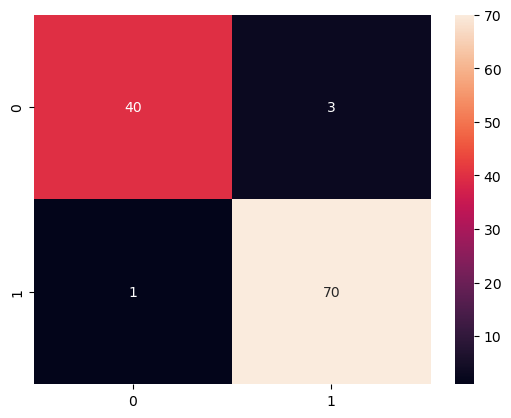

In [157]:
sns.heatmap(cm_gb,annot = True)

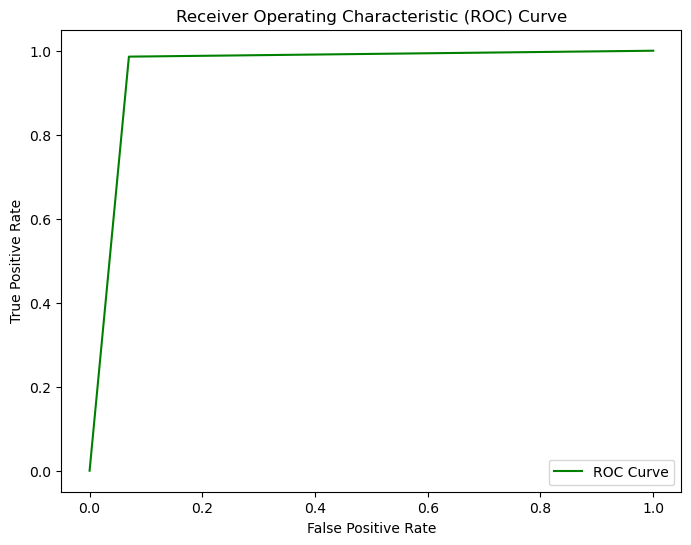

In [159]:
fpr,tpr,_ = roc_curve(y_test,y_pred_gb)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label="ROC Curve")  
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc='lower right')
plt.show()

In [161]:
# Model Comparison

In [163]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest","SVM", "k-NN","Guassian NB","Gradient Boosting"],
    "Accuracy": [accuracy,accuracy_dt,accuracy_rf,accuracy_svc,accuracy_knn,accuracy_nb,accuracy_gb]})

In [166]:
results = results.sort_values(by="Accuracy", ascending=False)
results

,Model,Accuracy
0,Logistic Regression,0.982456
3,SVM,0.982456
2,Random Forest,0.964912
6,Gradient Boosting,0.964912
4,k-NN,0.956140
5,Guassian NB,0.956140
1,Decision Tree,0.921053


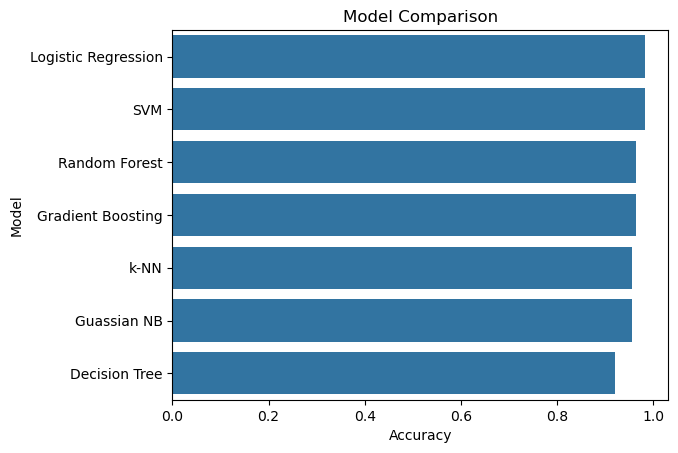

In [168]:
sns.barplot(x="Accuracy", y="Model", data=results)
plt.title("Model Comparison")
plt.show()

In [ ]:
# Best performed algorithm
Support Vector Machine (SVM) & Logistic Regression achieved the highest accuracy of 98.25%, making it the best-performing algorithm on 
this dataset. 
These models are particularly suitable for this dataset:
Logistic Regression is effective in linearly separable data.
SVM excels in handling high-dimensional features and finding optimal decision boundaries.


In [ ]:
#worst performing algorithm
Decision Tree performed the worst, with an accuracy of 92%.

Decision Tree may have underperformed due to overfitting or lack of regularization.

In [ ]:
#Insights
Top Performers: Logistic Regression and SVM indicate strong separability in the data.
Ensemble Models: Random Forest and Gradient Boosting show robust, consistent performance with accuracies of 96.49%.
Naive Bayes & k-NN: Slightly lower but respectable accuracies of 95.61%.
Decision Tree: Lower performance suggests the need for hyperparameter tuning or regularization.

In [ ]:
Use Logistic Regression or SVM for maximum accuracy.
Consider Random Forest or Gradient Boosting for slightly lower but reliable results.